## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [3]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 11.89 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [1]:
# doing Q1, Q2, Q5

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

In [18]:
# q1.1

filepath = r'/content/assignment3/data/car_data.csv'
df_car = pd.read_csv(filepath)
print(df_car.head(10), '\n')
print(df_car.dtypes, '\n')

   User ID  Gender  Age  AnnualSalary  Purchased
0      385    Male   35         20000          0
1      681    Male   40         43500          0
2      353    Male   49         74000          0
3      895    Male   40        107500          1
4      661    Male   25         79000          0
5      846  Female   47         33500          1
6      219  Female   46        132500          1
7      588    Male   42         64000          0
8       85  Female   30         84500          0
9      465    Male   41         52000          0 

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object 



In [19]:
#q1.2

var_user = 'User ID'
var_sex = 'Gender'
var_age = 'Age'
var_pay = 'AnnualSalary'
var_purch = 'Purchased'

print(df_car[var_user].describe(), '\n')
print(df_car[var_sex].describe(), '\n')
print(df_car[var_age].describe(), '\n')
print(df_car[var_pay].describe(), '\n')
print(df_car[var_purch].describe(), '\n')

count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: User ID, dtype: float64 

count       1000
unique         2
top       Female
freq         516
Name: Gender, dtype: object 

count    1000.000000
mean       40.106000
std        10.707073
min        18.000000
25%        32.000000
50%        40.000000
75%        48.000000
max        63.000000
Name: Age, dtype: float64 

count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375.000000
50%       72000.000000
75%       90000.000000
max      152500.000000
Name: AnnualSalary, dtype: float64 

count    1000.000000
mean        0.402000
std         0.490547
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Purchased, dtype: float64 



In [20]:
# no missings

df_car[var_sex] = df_car[var_sex].astype('str')

In [21]:
df_car['gen'] = 0

df_car.loc[df_car[var_sex] == 'Male', 'gen'] = 0
df_car.loc[df_car[var_sex] == 'Female', 'gen'] = 1


In [22]:
print(df_car['gen'])

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: gen, Length: 1000, dtype: int64


In [24]:
# inspect real quick

print(df_car.describe())

           User ID          Age   AnnualSalary    Purchased          gen
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000     0.516000
std     288.819436    10.707073   34488.341867     0.490547     0.499994
min       1.000000    18.000000   15000.000000     0.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000     1.000000
75%     750.250000    48.000000   90000.000000     1.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000     1.000000


In [25]:
y = df_car[var_purch]
X = df_car.loc[:,[var_age, var_pay]]

In [26]:
print(X)

     Age  AnnualSalary
0     35         20000
1     40         43500
2     49         74000
3     40        107500
4     25         79000
..   ...           ...
995   38         59000
996   47         23500
997   28        138500
998   48        134000
999   44         73500

[1000 rows x 2 columns]


In [27]:
# q1.3

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return(x)

X = X.apply(maxmin)
print(X.head(), '\n')
print(X.describe(), '\n')

        Age  AnnualSalary
0  0.377778      0.036364
1  0.488889      0.207273
2  0.688889      0.429091
3  0.488889      0.672727
4  0.155556      0.465455 

               Age  AnnualSalary
count  1000.000000   1000.000000
mean      0.491244      0.419556
std       0.237935      0.250824
min       0.000000      0.000000
25%       0.311111      0.228182
50%       0.488889      0.414545
75%       0.666667      0.545455
max       1.000000      1.000000 



In [28]:
# q1.4

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

[ 6 16]


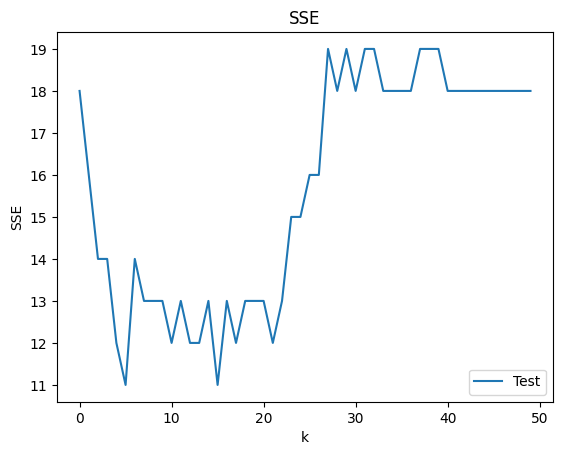

In [30]:
# q1.5

from sklearn.neighbors import KNeighborsClassifier

k_bar = 50
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel('k')
plt.ylabel('SSE')
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()


In [31]:
# best options either 6 or 16, figure 16 better

# q1.6

model = KNeighborsClassifier(n_neighbors=16)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,120,5
1,6,69


In [33]:
# 11/200 either false positive or false negative, rate of .055
# false positive: 5/74 or 0.068
# false negative: 6/126 or 0.048
# overall, pretty accurate

#q1.7

vars = [var_age, var_pay,'gen']
X = df_car.loc[:,vars]
y = df_car[var_purch]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

model = KNeighborsClassifier(n_neighbors=16)
fitted_model = model.fit(X_train.drop('gen',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('gen',axis=1))

y_hat_M = y_hat[X_test['gen'] == 0]
y_hat_F = y_hat[X_test['gen'] == 1]
y_M = y_test[X_test['gen'] == 0]
y_F = y_test[X_test['gen'] == 1]

In [34]:
# crosstab for male

pd.crosstab(y_hat_M, y_M)

Purchased,0,1
row_0,,
0,59,7
1,4,21


In [35]:
# crosstab for female

pd.crosstab(y_hat_F, y_F)

Purchased,0,1
row_0,,
0,57,12
1,5,35


In [ ]:
# male inaccuracy is 11/91 (0.12)
# female inaccuracy is 17/109 (0.156)

# pretty interesting that separating out the genders made it significantly more inaccurate for both
# not sure if it would have been different using 6 neighbors
# but seems to be slightly better at predicting males than females
# end q1

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [26]:
#q2.1

filepath = r'/content/assignment3/data/USA_cars_datasets.csv'
df = pd.read_csv(filepath)
vars = ['price','year','mileage']
df_usa = df[vars]
print(df_usa.describe(), '\n')
print(df_usa.dtypes, '\n')
print(df_usa.head(10))

              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06 

price      int64
year       int64
mileage    int64
dtype: object 

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
5   5700  2018    45561
6   7300  2010   149050
7  13350  2017    23525
8  14600  2018     9371
9   5250  2017    63418


In [27]:
#q2.2

X = df_usa.loc[:,['year', 'mileage']]

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return(x)

X = X.apply(maxmin)
print(X.head(), '\n')
print(X.describe(), '\n')

       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537 

              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000 



In [28]:
#q2.3

from sklearn.model_selection import train_test_split

y = df_usa['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

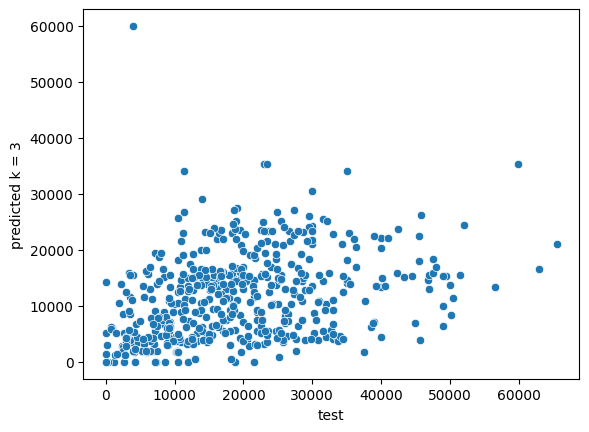

SSE = 100984089947 for k = 3


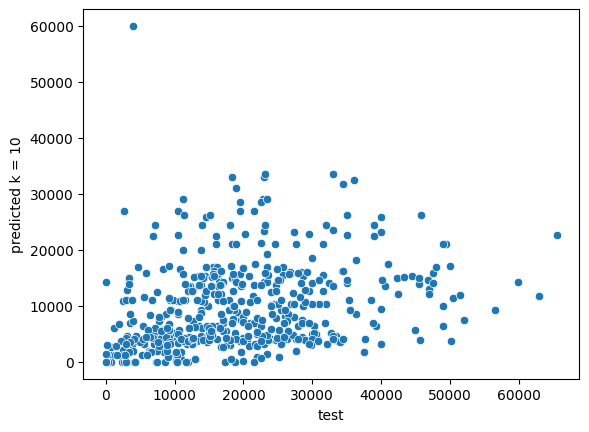

SSE = 121727052710 for k = 10


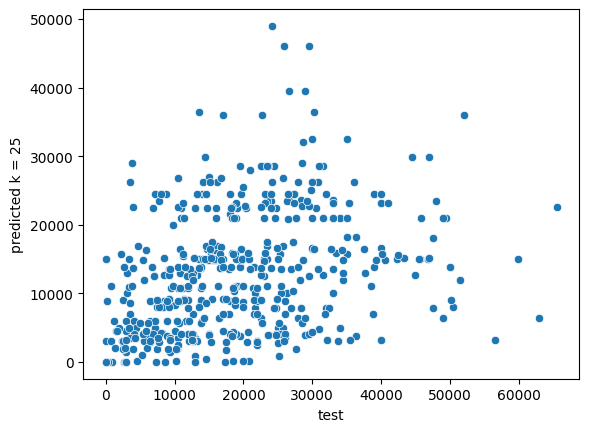

SSE = 95220278610 for k = 25


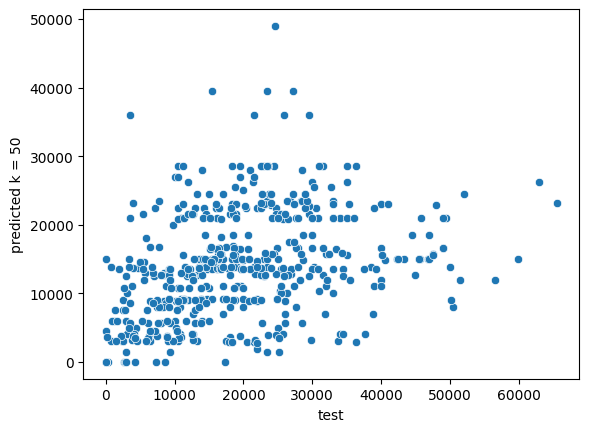

SSE = 84146526573 for k = 50


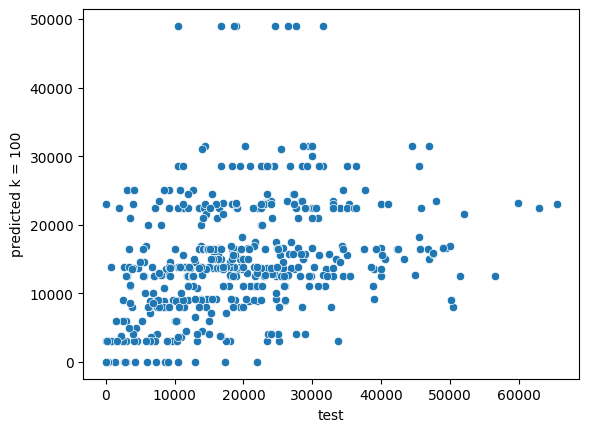

SSE = 82608195198 for k = 100


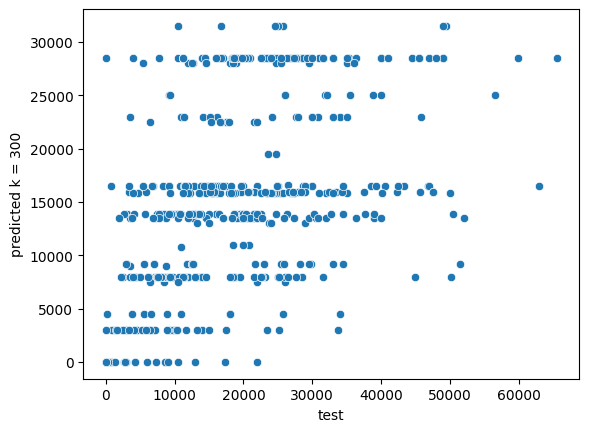

SSE = 70465858168 for k = 300


In [29]:
#q2.4

from sklearn.neighbors import KNeighborsClassifier

k_grid = [3,10,25,50,100,300]

def run_reg(k):
  model = KNeighborsClassifier(n_neighbors = k)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE = np.sum((y_test-y_hat)**2)
  this_plot = sns.scatterplot(x=y_test,y=y_hat)
  plt.xlabel('test')
  plt.ylabel('predicted k = ' + str(k))
  plt.show()
  print('SSE = ' + str(SSE) + ' for k = ' + str(k))
  return

for each in range(len(k_grid)):
  run_reg(k_grid[each])

In [ ]:
# I've spent several hours working on this and...
# I don't think it's wrong, it just sucks at predicting things.
# I would not use knn or this combination of predictors for this data
# if I had to choose one, I'd probably choose 50.
# can see that after 50, not so much a scatterplot as a series of lines
# because of the limits on the length of the test set (test set is len(~500))
# prediction sharply drops off in accuracy despite SSE decreasing
# if it worked, the scatterplot would relatively follow a slope of x = y, but it doesn't

[257]


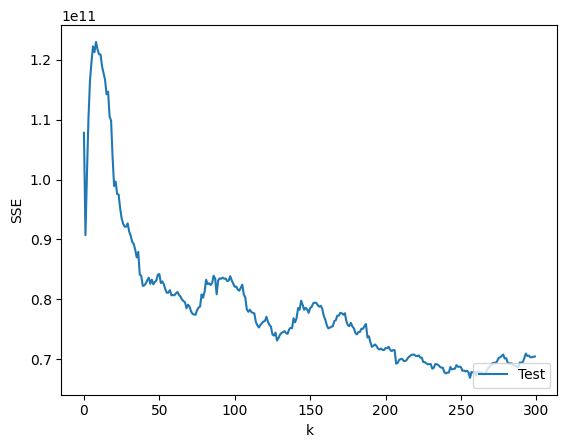

In [30]:
# q2.5

k_bar = 300
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

In [31]:
# optimal k seems to be 257 but we know from checking out the scatterplots that has its own issues

66888421368.0


Q2.6:

This model not only sucks, it makes sense that it sucks, which makes me at least a little happy.

We could, of course, theorize that price ought to be somewhat dependent on model year and how many miles have been put on the car. However, this model quite clearly suffers from an underfitting problem; it cannot accurately predict price when it only takes into account model year and mileage. The absolutely massive SSE (partially explained by the magnitude of the y variable, but not entirely) and the lack of a distinct slope to the scatterplots means that none of the k values seem effective. Evidenced in the head of the data seen in 2.1: year seems to have a negligible effect if we compare observations 2 and 3, and mileage seems to have a negligible effect on price beyond a couple thousand, as evidenced by most of the high mileage cars having very similar prices.

A small note on what I think I'm actually supposed to have got out of this: I would say that the above more or less explains the underfit of any model, no matter how high the k. By the time we get to k=257, despite the shrinking SSE, a significant number of test values will have the exact same predicted outcomes because of the small size of the test and training sets. It's pretty evident from just general knowledge that mileage has a weird nonlinear impact on car price, and I don't think the model was ever able to figure that out given the specific test/training split. It may require a test/training set of many tens of thousands of cars before this model provides useful information.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [34]:
# q5.1

filepath = r'/content/assignment3/data/airbnb_hw.csv'
df = pd.read_csv(filepath)

In [35]:
# just copy/pasting from when I cleaned the price variable in assignment2

var = 'Price'
print('Before coercion: \n', df[var].describe(),'\n')

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



In [36]:
df[var] = df[var].astype('str')
df[var] = df[var].str.replace(',', '')
df[var] = pd.to_numeric(df[var], errors='coerce')

In [37]:
print('After coercion: \n', df[var].describe(),'\n')
df[var+'_nan'] = df[var].isnull()
print('Total missing: \n', sum(df[var+'_nan']),'\n')

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total missing: 
 0 



In [38]:
print('Before coercion: \n', df['Beds'].describe(),'\n')

Before coercion: 
 count    30393.000000
mean         1.530089
std          1.015359
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64 



In [45]:
# looks like several nans but hard to find/tell
print(df['Beds'].unique(), '\n')
print(df['Beds'].value_counts(), '\n')

[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.] 

1.0     20344
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: Beds, dtype: int64 



In [46]:
# just gonna remove the nans after looking at the other stuff, it's already in float form so we chilling

rev = df['Number Of Reviews']

print('Before coercion: \n', rev.describe(),'\n')

Before coercion: 
 count    30478.000000
mean        12.018735
std         21.980703
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        257.000000
Name: Number Of Reviews, dtype: float64 



In [47]:
# already in float form, already chilling! those 0 review ones are gonna be trouble though

rev_score = df['Review Scores Rating']

print('Before coercion: \n', rev_score.describe(),'\n')

Before coercion: 
 count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64 



In [48]:
# quite a few values short

print(rev_score.unique(), '\n')
print(rev_score.value_counts(), '\n')

[ nan  96. 100.  94.  90.  98.  93.  91.  97.  95.  99.  85.  86.  80.
  88.  92.  89.  82.  87.  81.  76.  78.  83.  66.  84.  72.  79.  60.
  40.  62.  74.  77.  50.  71.  75.  73.  69.  65.  68.  70.  67.  64.
  20.  57.  58.  43.  63.  55.  47.  53.  49.  30.] 

100.0    5594
90.0     1729
93.0     1614
80.0     1423
95.0     1295
96.0     1188
97.0     1033
94.0      943
92.0      875
98.0      843
91.0      812
87.0      714
88.0      614
89.0      561
85.0      365
86.0      348
99.0      318
84.0      289
83.0      267
60.0      244
82.0      136
70.0      132
73.0       89
78.0       84
77.0       80
76.0       75
81.0       66
75.0       60
40.0       47
79.0       46
67.0       42
20.0       39
72.0       32
74.0       26
71.0       22
65.0       21
68.0       19
50.0       19
69.0       11
53.0        8
63.0        5
62.0        5
64.0        4
55.0        3
47.0        3
66.0        3
58.0        2
43.0        2
57.0        2
30.0        2
49.0        1
Name: Review Scores

In [52]:
# now to remove all nan values in both the beds category and the review scores category

# q5.2

X = df.loc[ : , ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'] ]

drop_X = X.dropna()
print(drop_X.describe())

              Price          Beds  Number Of Reviews  Review Scores Rating
count  22111.000000  22111.000000       22111.000000          22111.000000
mean     154.798697      1.558093          16.523179             91.991633
std      148.901275      1.044014          24.322185              8.851965
min       10.000000      0.000000           1.000000             20.000000
25%       85.000000      1.000000           3.000000             89.000000
50%      125.000000      1.000000           7.000000             94.000000
75%      190.000000      2.000000          20.000000            100.000000
max    10000.000000     16.000000         257.000000            100.000000


In [54]:
# seems pretty chill and successful

# import KMeans and normalize the lads

from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

y = drop_X['Price']
# assuming that price needs to stay intact in this situation given what we're gonna do with it

X = drop_X.loc[ : , ['Beds', 'Number Of Reviews', 'Review Scores Rating'] ]

X = X.apply(maxmin)

print(X.describe(), '\n')
print(y.describe(), '\n')

               Beds  Number Of Reviews  Review Scores Rating
count  22111.000000       22111.000000          22111.000000
mean       0.097381           0.060637              0.899895
std        0.065251           0.095009              0.110650
min        0.000000           0.000000              0.000000
25%        0.062500           0.007812              0.862500
50%        0.062500           0.023438              0.925000
75%        0.125000           0.074219              1.000000
max        1.000000           1.000000              1.000000 

count    22111.000000
mean       154.798697
std        148.901275
min         10.000000
25%         85.000000
50%        125.000000
75%        190.000000
max      10000.000000
Name: Price, dtype: float64 



In [55]:
# time to cluster
# q5.3

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)

# Fit the kmc model:
model = model.fit(X)

# Predict values:
drop_X['x_hat'] = model.predict(X)

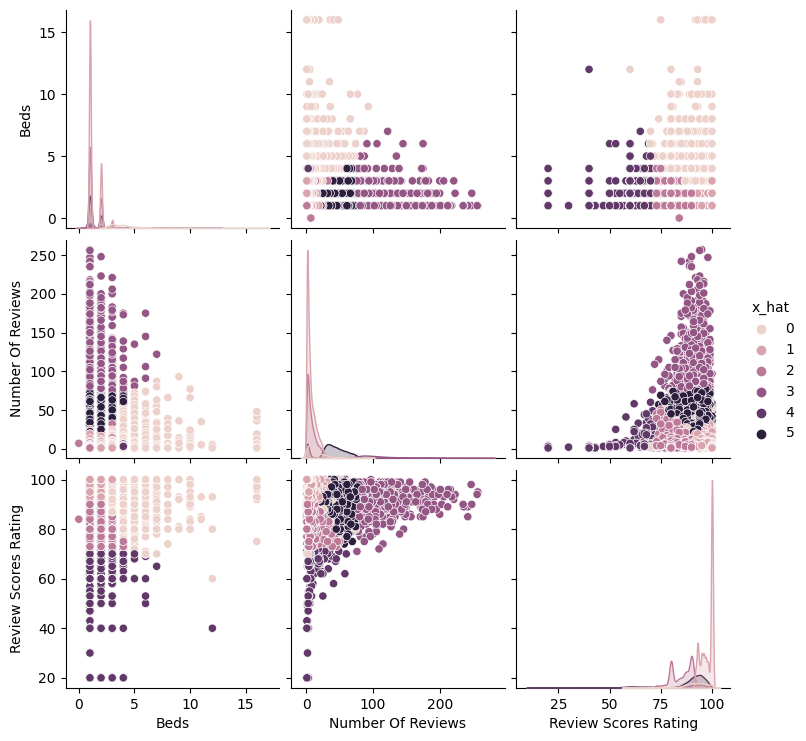

In [57]:
#q5.4

vars = ['Beds', 'Number Of Reviews', 'Review Scores Rating']

sns.pairplot(data=drop_X, vars=vars, hue='x_hat')

In [58]:
# q5.5

drop_X.loc[:,['x_hat', 'Price']].groupby('x_hat').describe()

Price                                                             
         count        mean         std   min     25%    50%    75%      max
x_hat                                                                      
0       1627.0  293.440688  262.877909  27.0  150.00  229.0  350.0   4500.0
1      10491.0  152.199600  147.277659  10.0   85.00  130.0  190.0  10000.0
2       5547.0  131.671174  102.821180  20.0   75.00  110.0  169.0   5000.0
3        793.0  133.311475   83.104413  27.0   80.00  110.0  169.0    875.0
4        631.0  133.561014  215.675540  25.0   65.00   99.0  152.5   5000.0
5       3022.0  141.703177   84.214663  22.0   87.25  125.0  175.0   1000.0

In [ ]:
# clusters 0 and 1 have the highest rental prices
# this makes sense because these two clusters seem to include most of the listings
# with lots of bedrooms and high review scores
# meanwhile cluster 3, for example, has many of the most-reviewed listings
# makes sense that these are not the most expensive because they are probably more frequently booked

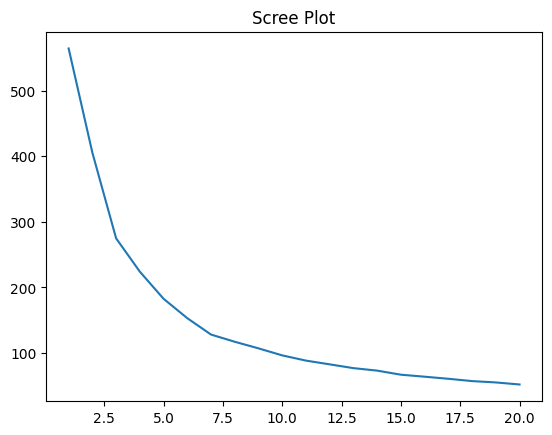

In [59]:
# q5.6

k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

In [60]:
# reckon the elbow's k=7
# could make an argument for 3 but 7 seems better
# would point out that there isn't really a distinct elbow
# so clustering probably isn't the best option here

model = KMeans(n_clusters=7, max_iter=300, n_init = 10, random_state=0)

# Fit the kmc model:
model = model.fit(X)

# Predict values:
drop_X['x_hat'] = model.predict(X)

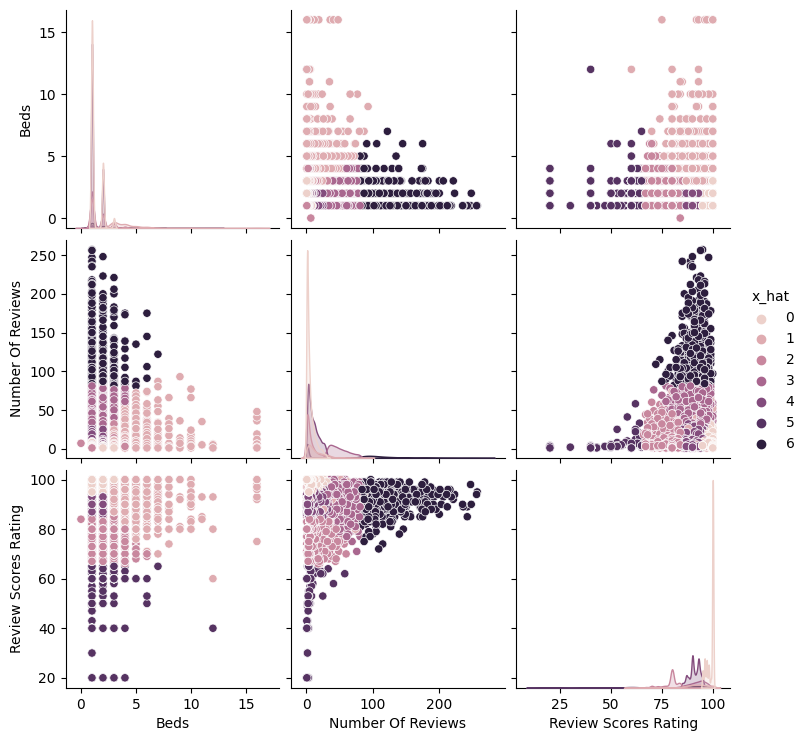

In [61]:
vars = ['Beds', 'Number Of Reviews', 'Review Scores Rating']

sns.pairplot(data=drop_X, vars=vars, hue='x_hat')

In [ ]:
# I'm gonna be so honest this scatterplot thing isn't helpful
# hues are too close and the way the beds variable is weighted it's damn hard to see

In [62]:
drop_X.loc[:,['x_hat', 'Price']].groupby('x_hat').describe()

Price                                                            
        count        mean         std   min    25%    50%    75%      max
x_hat                                                                    
0      8127.0  154.243140  118.282886  10.0   85.0  130.0  195.0   3500.0
1      1633.0  294.323331  261.611807  27.0  150.0  230.0  359.0   4500.0
2      2675.0  133.857570  128.841920  20.0   70.0  110.0  169.0   5000.0
3      2607.0  139.393556   82.850489  22.0   85.0  120.0  175.0    895.0
4      5996.0  137.758672  150.613885  24.0   80.0  120.0  175.0  10000.0
5       407.0  129.533170  255.865812  25.0   60.0   90.0  150.0   5000.0
6       666.0  132.734234   78.224046  29.0   80.0  110.0  165.0    649.0

**CP** quick q5.6 writeup:

Looks like the most expensive cluster is cluster 1. Quick glance at the beds/review scores scatterplot explains this one, cluster 1 is all the ones with lots of beds and good reviews. Also trend of the ones with the most reviews not being the msot expensive, still makes sense to me. It's rather difficult to figure out why the outlier ($10000 price) changed groups just by looking at the scatterplot simply because there are so many observations that I can only assume they're covering each other up.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?